In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install required libraries

In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install pygoogletranslation
!pip install emoji
!pip install nltk
!pip install wordcloud

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Import required libraries

In [2]:
import pandas as pd
import googletrans
from googletrans.models import TranslatedPart
from pygoogletranslation import Translator
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Load the data set

In [83]:
df = pd.read_excel('/content/drive/MyDrive/AdFactors_PR_Assignment/Assignment - Sample Dataset.xlsx')
df.head()

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Reactions,Threads,Is Verified,Parent URL,Document Tags,Type,Category,Key theme,Theme Cat,Local or International
0,01-Apr-2024 02:28PM,MAS ECO GO BEYOND,https://lmd.lk/mas-eco-go-beyond/,"Celebrating a 17 Year legacy of Education, Ada...","... ,” explained Amanthi Perera, Head of Socia...",LMD: Sri Lanka Business Magazine,NaN,Sri Lanka,NaN,English,...,NaN,NaN,NaN,NaN,NaN,News,Member,Sustainability,Business of Apparel,Local
1,01-Apr-2024 03:19PM,NEW REPORT PROPOSES SEVEN RECOMMEDATIONS TO PR...,https://www.fashionatingworld.com/new1-2/new-r...,A report released by a coalition of prominent ...,NEW REPORT PROPOSES SEVEN RECOMMEDATIONS TO PR...,FashionatingWorld,NaN,Unknown,NaN,English,...,NaN,NaN,NaN,NaN,NaN,News,Industry,Sustainability,Business of Apparel,International
2,01-Apr-2024 03:23PM,Yohan Lawrence | Secretary General | JAAFSL,http://www.fibre2fashion.com/interviews/face2f...,JAAFSL stands as a linchpin in Sri Lanka’s app...,Yohan Lawrence | Secretary General | JAAFSL,Fibre2Fashion Magazine,NaN,Unknown,NaN,English,...,NaN,NaN,NaN,NaN,NaN,News,Headline mention,JAAF Interview,Business of Apparel,International
3,01-Apr-2024 04:34AM,Imports spike 35% YoY in February to $ 1.38 b,https://www.ft.lk/front-page/Imports-spike-35-...,Imports in February spiked by 35% year on year...,... and garment exports. The export volume ind...,Daily FT,NaN,Sri Lanka,NaN,English,...,NaN,NaN,NaN,NaN,NaN,News,Industry,Economic crisis & Stability,Community,Local
4,01-Apr-2024 09:11PM,Sri Lanka trade account deficit widened in nor...,https://lankanewsweb.net/archives/54133/sri-la...,"April 01, Colombo (LNW): Sri Lanka has widened...","By: Staff Writer April 01, Colombo (LNW): Sri ...",Lanka News Web,NaN,Sri Lanka,NaN,English,...,NaN,NaN,NaN,NaN,NaN,News,Industry,Economic crisis & Stability,Community,Local


# Information about the data set

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    179 non-null    object        
 1   Headline                144 non-null    object        
 2   URL                     179 non-null    object        
 3   Opening Text            158 non-null    object        
 4   Hit Sentence            159 non-null    object        
 5   Source                  173 non-null    object        
 6   Influencer              45 non-null     object        
 7   Country                 173 non-null    object        
 8   Subregion               11 non-null     object        
 9   Language                173 non-null    object        
 10  P. Reach                179 non-null    float64       
 11  Reach                   157 non-null    float64       
 12  Desktop Reach           125 non-null    float64   

In [85]:
print('Number of Articals = ',df.shape[0])
print('Number of Columns = ',df.shape[1])

Number of Articals =  179
Number of Columns =  56


# Finding te percentage of Null values

In [86]:
round(df.isna().mean()*100,0)

Date                        0.0
Headline                   20.0
URL                         0.0
Opening Text               12.0
Hit Sentence               11.0
Source                      3.0
Influencer                 75.0
Country                     3.0
Subregion                  94.0
Language                    3.0
P. Reach                    0.0
Reach                      12.0
Desktop Reach              30.0
Mobile Reach               30.0
Twitter Social Echo        30.0
Facebook Social Echo       30.0
Reddit Social Echo         30.0
National Viewership       100.0
Engagement                 87.0
AVE                        11.0
Sentiment                   0.0
Key Phrases                21.0
Input Name                 11.0
Keywords                   11.0
Twitter Authority          83.0
Tweet Id                   83.0
Twitter Id                 83.0
Twitter Client            100.0
Twitter Screen Name        83.0
User Profile Url           81.0
Twitter Bio                83.0
Twitter 

# Data Preprocessing

### Remove 75% above null value exist columns and unwanted columns

In [87]:
columns_names = df.isna().mean().index
null_percent = round(df.isna().mean()*100,0).tolist()

dropping_columns = []
for i in range(len(columns_names)):
  if null_percent[i] >=75:
    dropping_columns.append(columns_names[i])

df.drop(dropping_columns, axis = 1, inplace = True)
df.drop(['Reach', 'Desktop Reach', 'Mobile Reach', 'Twitter Social Echo', 'Facebook Social Echo', 'Reddit Social Echo', 'Input Name', 'Keywords',
         'Alternate Date Format', 'Social Echo Total', 'Estimated Views'], axis = 1, inplace = True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    179 non-null    object 
 1   Headline                144 non-null    object 
 2   URL                     179 non-null    object 
 3   Opening Text            158 non-null    object 
 4   Hit Sentence            159 non-null    object 
 5   Source                  173 non-null    object 
 6   Country                 173 non-null    object 
 7   Language                173 non-null    object 
 8   P. Reach                179 non-null    float64
 9   AVE                     159 non-null    float64
 10  Sentiment               179 non-null    object 
 11  Key Phrases             141 non-null    object 
 12  Time                    159 non-null    object 
 13  Type                    179 non-null    object 
 14  Category                179 non-null    ob

## Covert Date in to Datetime format

In [89]:
df.insert(0, 'DateTime', '')
df['DateTime']=pd.to_datetime(df['Date'])

df.drop('Date', axis = 1, inplace = True)
df.drop('Time', axis = 1, inplace = True)

df.insert(1, 'Date', '')
df.insert(2, 'Time', '')
df.insert(3, 'DayName', '')

df['Date'] = df['DateTime'].dt.date
df['Date']=pd.to_datetime(df['Date'])
df['Time'] = df['DateTime'].dt.time
df['DayName'] = df['DateTime'].dt.day_name()

df.drop('DateTime', axis = 1, inplace = True)
df.sort_values(by = ['Date','Time'], inplace = True)
df.head()

<ipython-input-89-4c2d19ac8da6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime']=pd.to_datetime(df['Date'])


,Date,Time,DayName,Headline,URL,Opening Text,Hit Sentence,Source,Country,Language,P. Reach,AVE,Sentiment,Key Phrases,Type,Category,Key theme,Theme Cat,Local or International
7,2024-04-01,00:01:00,Monday,Trade account reflects normalising economy,https://www.dailymirror.lk/business/Trade-acco...,Both imports & exports up in a sign of synchro...,... on fuel imports as the demand had been low...,Daily Mirror,Sri Lanka,English,10097.175,3735.95,Positive,"agricultural sector exports,aviation fuel expo...",News,Industry,Economic crisis & Stability,Community,Local
8,2024-04-01,00:01:00,Monday,NaN,https://twitter.com/aruni_t/status/17746973095...,NaN,NaN,NaN,NaN,NaN,0.000,NaN,Negative,NaN,Social,Industry,Misc,Business of Apparel,Local
3,2024-04-01,04:34:00,Monday,Imports spike 35% YoY in February to $ 1.38 b,https://www.ft.lk/front-page/Imports-spike-35-...,Imports in February spiked by 35% year on year...,... and garment exports. The export volume ind...,Daily FT,Sri Lanka,English,3264.500,1207.87,Positive,"agricultural goods,australian dollar,aviation ...",News,Industry,Economic crisis & Stability,Community,Local
6,2024-04-01,11:47:00,Monday,"Trade Deficit widens in February, reflecting e...",https://lankanewsweb.net/archives/54117/trade-...,"However, the deficit contracted significantly ...","April 01, Colombo (LNW): In February, the defi...",Lanka News Web,Sri Lanka,English,1282.975,474.70,Positive,"bunkering and aviation fuel,consumer,consumer ...",News,Industry,Economic crisis & Stability,Community,Local
0,2024-04-01,14:28:00,Monday,MAS ECO GO BEYOND,https://lmd.lk/mas-eco-go-beyond/,"Celebrating a 17 Year legacy of Education, Ada...","... ,” explained Amanthi Perera, Head of Socia...",LMD: Sri Lanka Business Magazine,Sri Lanka,English,220.100,81.44,Positive,"adaptation initiatives,approach,champion susta...",News,Member,Sustainability,Business of Apparel,Local


In [90]:
start = df['Date'].min()
end = df['Date'].max()

print('Starting date = ', start.date())
print('Ending date = ', end.date())
print('Time duration = ', (end - start))

Starting date =  2024-04-01
Ending date =  2024-05-06
Time duration =  35 days 00:00:00


In [91]:
df['Key Phrases'] = df['Key Phrases'].astype(str)
df['Key Phrases'] = df['Key Phrases'].apply(lambda x: ' '.join([item.strip() for item in x.split(',') if item != ' ']))

### Translate the Sinhala and Tamil languages into English language

In [92]:
def translate(sentence):
  translator = Translator()
  translated_text = translator.translate(sentence, dest='en').text
  return translated_text

In [93]:
df['Key Phrases'] = df['Key Phrases'].apply(lambda x: translate(x))

### Remove punctuation marks

In [94]:
# string.punctuation - !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
df['Key Phrases'] = df['Key Phrases'].str.replace('[{}]'.format(string.punctuation),'',case=True, regex=True)

### Remove numbers

In [95]:
df['Key Phrases'] = df['Key Phrases'].str.replace('\d+', '',regex=True)

### Convert emojies in to text

In [96]:
df['Key Phrases'] = df['Key Phrases'].apply(lambda x: emoji.demojize(x,delimiters=("","")))
df['Key Phrases'] = df['Key Phrases'].str.replace('_',' ',regex=True).replace('-',' ',regex=True)

### Remove stop words

In [97]:
stopWord = stopwords.words('english')
df['Key Phrases'] = df['Key Phrases'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopWord]))

### Tokenizing and Lemmatizing

In [98]:
df['Key Phrases'] = df['Key Phrases'].apply(lambda x: nltk.word_tokenize(x)) # Tokenizing

lem = WordNetLemmatizer()
df['Key Phrases'] = df['Key Phrases'].apply(lambda x: ' '.join([lem.lemmatize(word, pos='v') for word in x])) #pos - part-of-speech,  v

# Perform EDA

## Sentiment Distribution

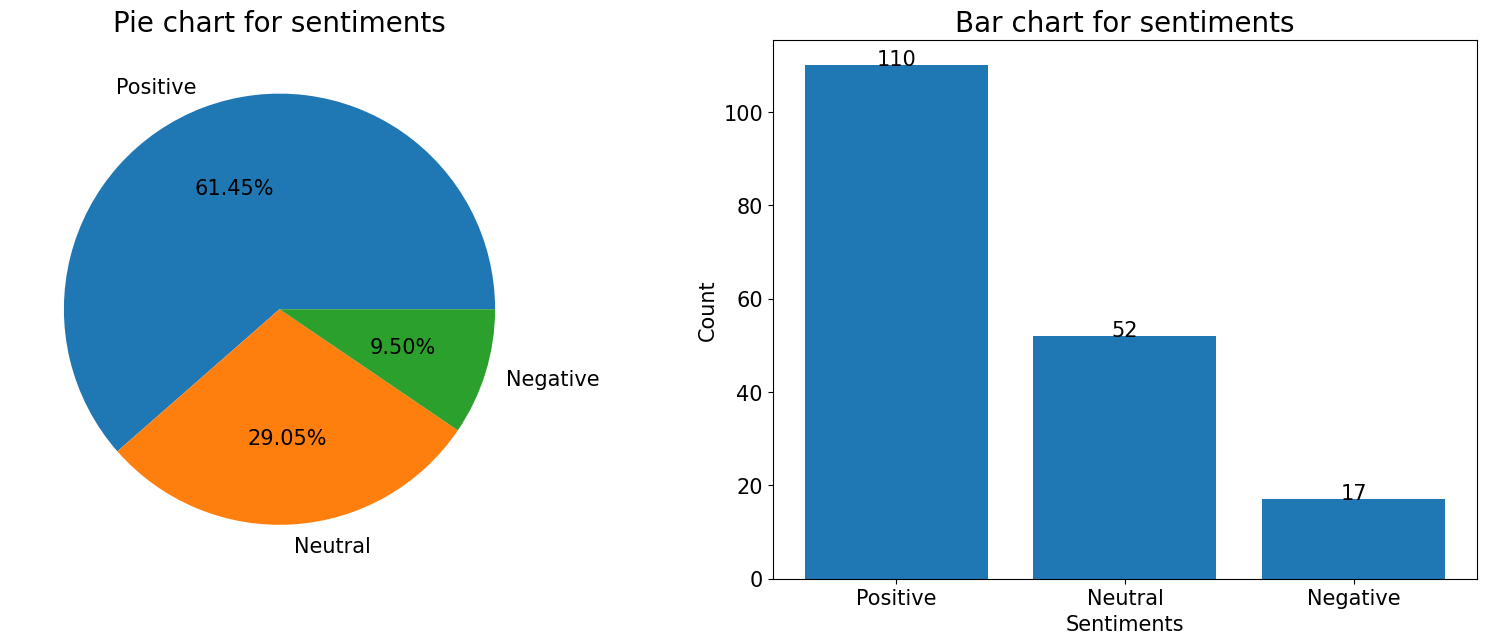

In [99]:
sentiment = df['Sentiment'].value_counts().index
count = df['Sentiment'].value_counts().tolist()

fig = plt.figure(figsize =(20, 7))

plt.rcParams['font.size'] = 15
fig.add_subplot(121)
plt.pie(count, labels=sentiment, autopct='%1.2f%%')
plt.title('Pie chart for sentiments', fontsize=20)


plt.rcParams['font.size'] = 15
fig.add_subplot(122)
plt.bar(sentiment, count)
plt.title('Bar chart for sentiments', fontsize=20)
plt.xlabel('Sentiments', fontsize=15)
plt.ylabel('Count', fontsize=15)
for i in range(len(sentiment)):
  plt.text(i, count[i], count[i], ha = 'center', fontsize=15)

plt.show()

## Key Themes

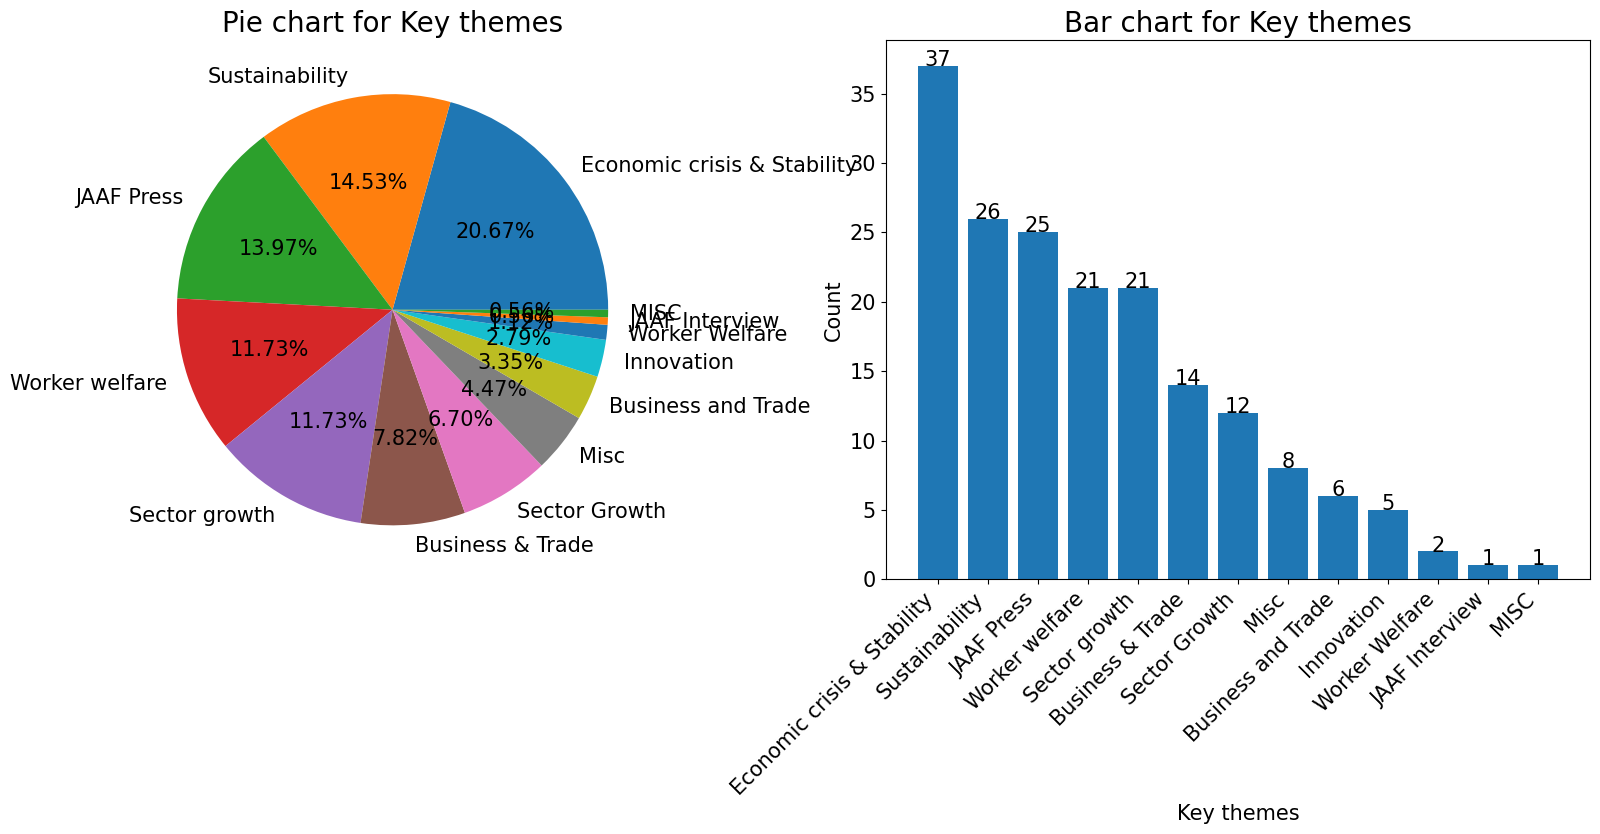

In [100]:
Key_theme = df['Key theme'].value_counts().index
count = df['Key theme'].value_counts().tolist()

fig = plt.figure(figsize =(20, 7))

plt.rcParams['font.size'] = 15
fig.add_subplot(121)
plt.pie(count, labels=Key_theme, autopct='%1.2f%%')
plt.title('Pie chart for Key themes', fontsize=20)


plt.rcParams['font.size'] = 15
fig.add_subplot(122)
plt.bar(Key_theme, count)
plt.title('Bar chart for Key themes', fontsize=20)
plt.xlabel('Key themes', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, ha='right')
for i in range(len(Key_theme)):
  plt.text(i, count[i], count[i], ha = 'center', fontsize=15)

plt.show()

## Geographical Coverage

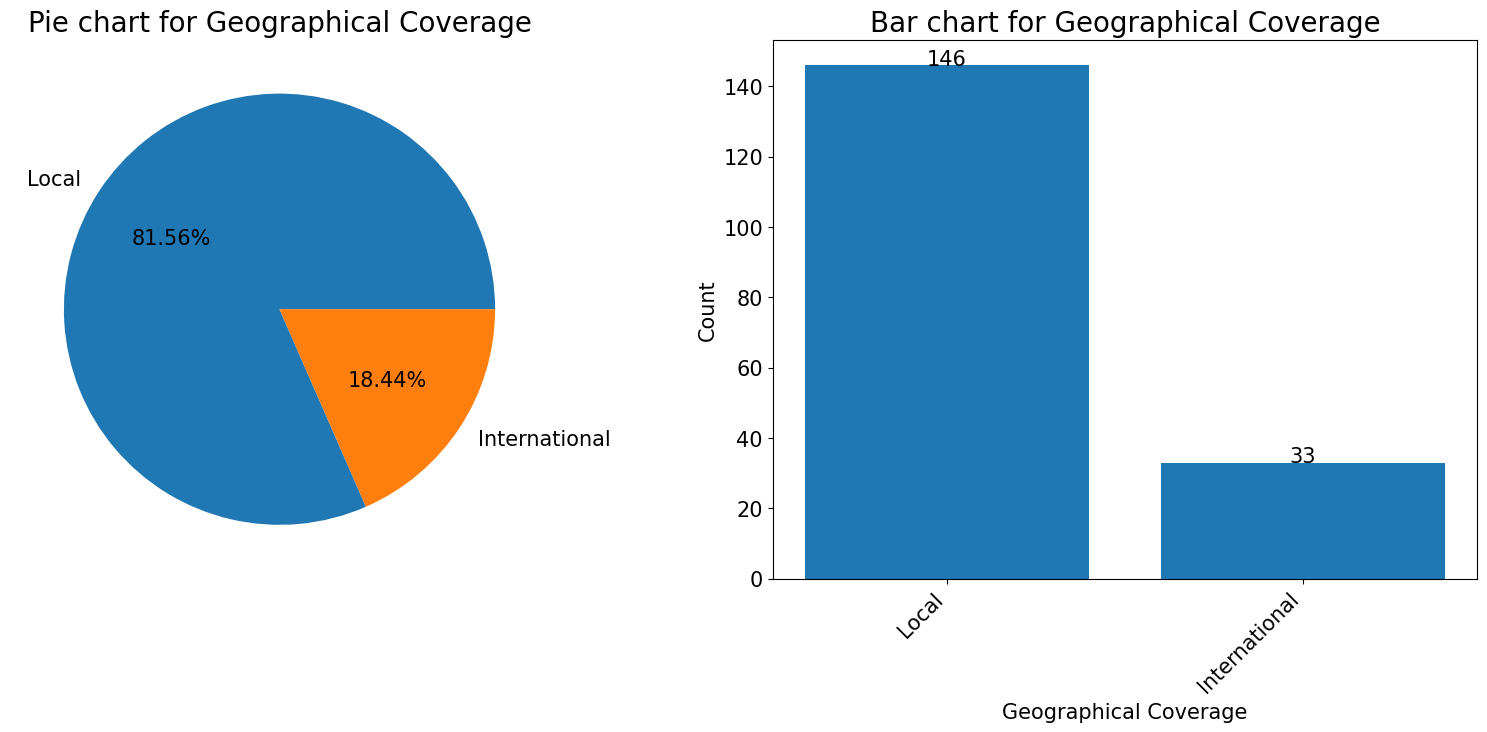

In [101]:
geographical = df['Local or International'].value_counts().index
count = df['Local or International'].value_counts().tolist()

fig = plt.figure(figsize =(20, 7))

plt.rcParams['font.size'] = 15
fig.add_subplot(121)
plt.pie(count, labels=geographical, autopct='%1.2f%%')
plt.title('Pie chart for Geographical Coverage', fontsize=20)


plt.rcParams['font.size'] = 15
fig.add_subplot(122)
plt.bar(geographical, count)
plt.title('Bar chart for Geographical Coverage', fontsize=20)
plt.xlabel('Geographical Coverage', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, ha='right')
for i in range(len(geographical)):
  plt.text(i, count[i], count[i], ha = 'center', fontsize=15)

plt.show()

# Word cloud for April month

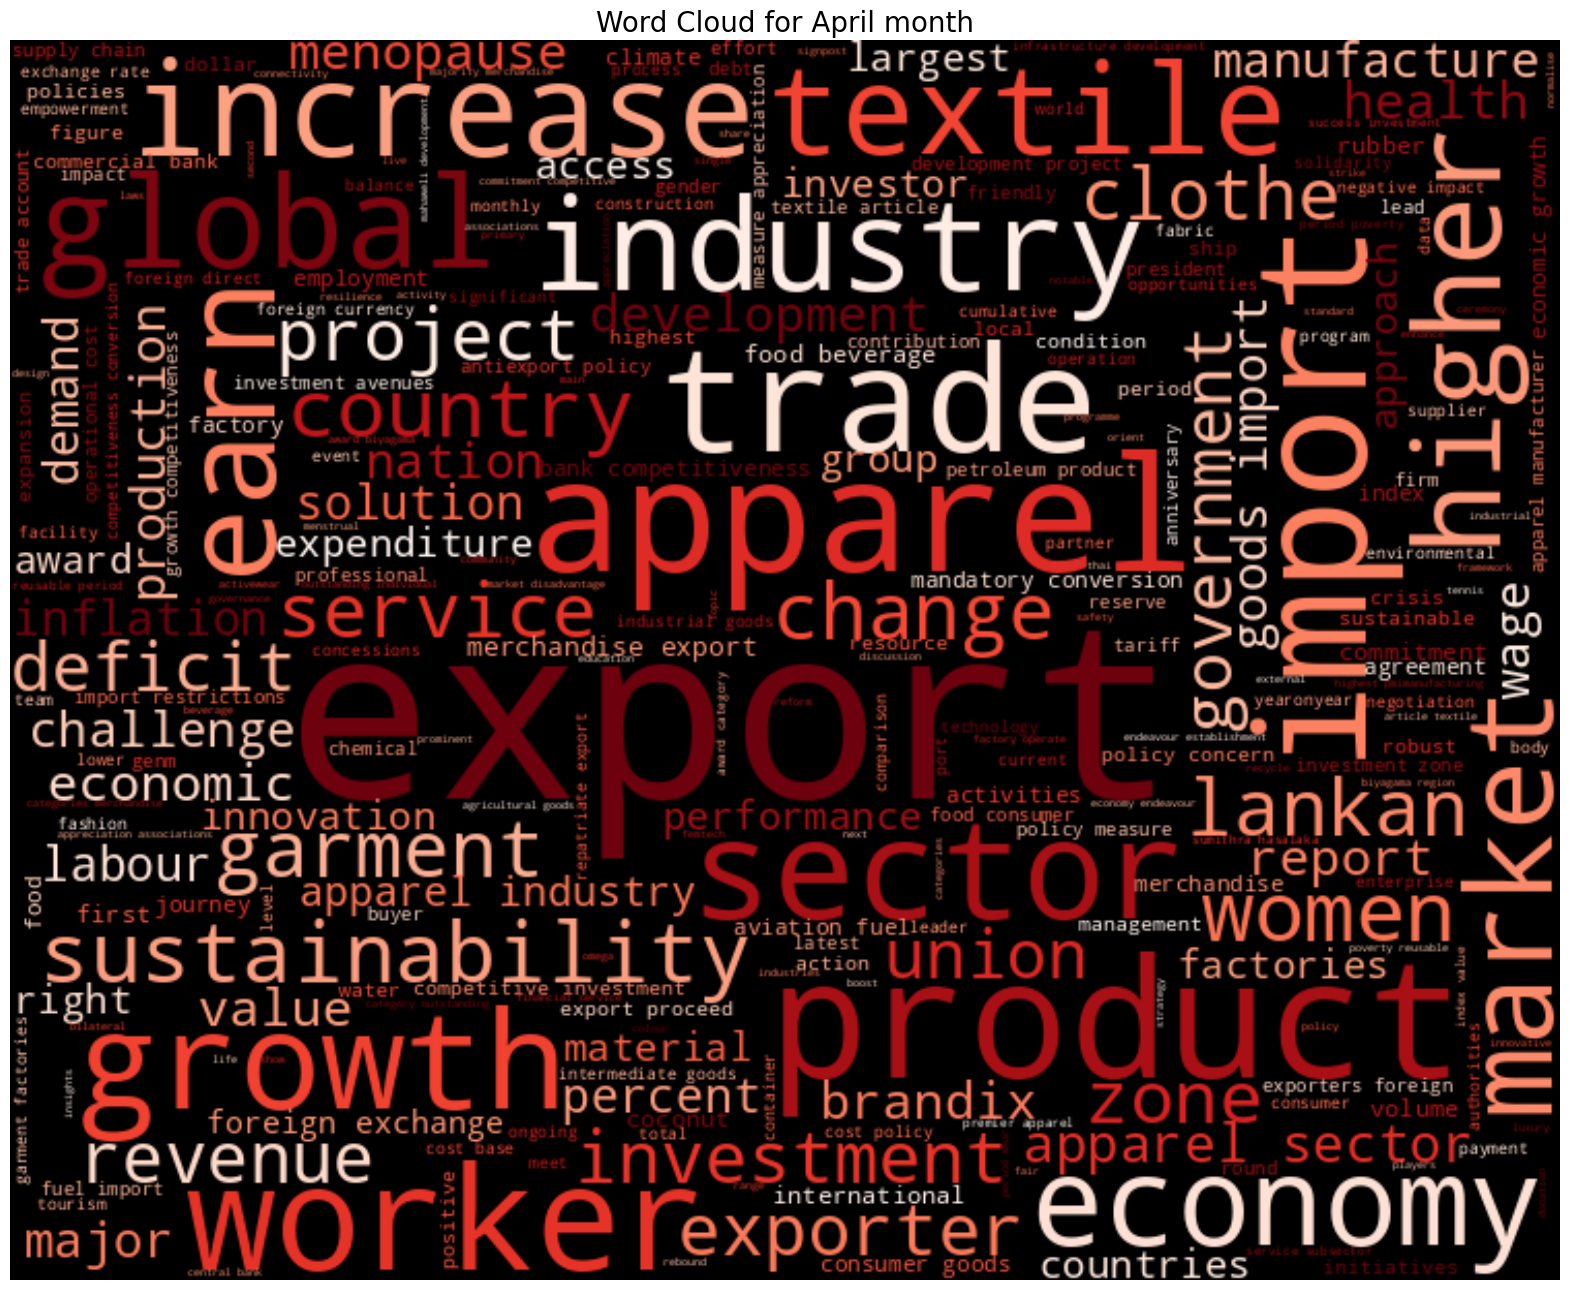

In [102]:
Msg = df['Key Phrases'].tolist()
Msg = ' '.join(Msg)
text = WordCloud(width = 750,
                       height = 600,
                       colormap = 'Reds',
                       margin = 0,
                       max_words = 500,
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 5,
                       background_color = "black").generate(Msg)
plt.figure(figsize=(20,20))
plt.imshow(text,interpolation='bilinear')
plt.title('Word Cloud for April month', fontsize = 20)
plt.axis('off')
plt.show()

# Word cloud and frequently used 20 words bar plot for week by week

In [103]:
def plot_word_cloud(substract_df, title, fig):
    msg = substract_df['Key Phrases'].tolist()
    msg = ' '.join(msg)
    text = WordCloud(width = 750, height = 600, colormap = 'Reds', margin = 0,
                    max_words = 500, min_word_length = 4, max_font_size = 120,
                    min_font_size = 15, background_color = "black").generate(msg)

    fig.add_subplot(121)
    plt.title(title)
    plt.axis('off')
    plt.imshow(text,interpolation='bilinear')

In [104]:
def create_word_count_df(substract_df):
  msg = substract_df['Key Phrases'].tolist()
  all_msgs = []
  for MSG in msg:
    temp = MSG.split(' ')
    all_msgs += temp

  msg = ','.join(all_msgs)
  counts = dict()
  words = msg.split(',')
  for word in words:
    if word in counts:
      counts[word] += 1
    else:
      counts[word] = 1

  data = list(counts.items())
  dff = pd.DataFrame(data, columns=["word", "count"])
  dff.sort_values(by = ['count'], ascending=False, inplace = True)

  return dff[0:20]

In [105]:
def plot_bar_graph(substract_df, title, fig):

  dff = create_word_count_df(substract_df)

  x, y = dff['word'].tolist(), dff['count'].tolist()
  plt.rcParams['font.size'] = 15
  fig.add_subplot(122)
  plt.title(title)
  plt.bar(x, y)
  plt.xticks(rotation=45, ha='right')

  for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')

In [106]:
start_date = df['Date'].min()
end_date = df['Date'].max()

for i in range(20):
  fig = plt.figure(figsize =(20, 7))
  if start_date < end_date:
    after_week_date = pd.to_datetime(start_date) + pd.DateOffset(days=6)
    substract_df = df.loc[df["Date"].between(start_date, after_week_date)]

    title = f'{start_date.date()} - {after_week_date.date()}  -  WEEK NO. {i+1}'
    plot_word_cloud(substract_df, title, fig)
    plot_bar_graph(substract_df, title, fig)
    plt.show()
    start_date = after_week_date + pd.DateOffset(days=1)
  else:
    substract_df = df.loc[df["Date"].between(start_date, end_date)]

    title = f'{start_date.date()} - {after_week_date.date()}  -  WEEK NO. {i+1}'
    plot_word_cloud(substract_df, title, fig)
    plot_bar_graph(substract_df, title, fig)
    plt.show()
    break

Output hidden; open in https://colab.research.google.com to view.

# Word cloud and frequently used 20 words bar plot for each sources

In [107]:
sources = df['Source'].value_counts().index

for source in sources:
  fig = plt.figure(figsize =(20, 7))
  substract_df = df.loc[df['Source'] == source]
  title = f'Source - {source}'
  try:
    plot_word_cloud(substract_df, title, fig)
    plot_bar_graph(substract_df, title, fig)
    plt.show()
  except ValueError:
    continue

Output hidden; open in https://colab.research.google.com to view.

In [108]:
df.set_index('Date', inplace=True)
df.to_csv('/content/drive/MyDrive/AdFactors_PR_Assignment/Assignment - Preprocessed Dataset.csv')